# Problem Set 6
Bethany Bailey

In [3]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

## Problem 1
### (a)

In [4]:
biden = pd.read_csv('biden.csv')
biden.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [5]:
y = biden['biden'].values
X = biden[['female', 'age', 'educ', 'dem', 'rep']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,
                                                    random_state=25)

In [6]:
# Though it was not requested in the problem, I need to set a max depth in order to get the tree to
# plot the tree. I chose max_depth=3 because it had the lowest MSE.
b_tree = DecisionTreeRegressor(max_depth=3)
b_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

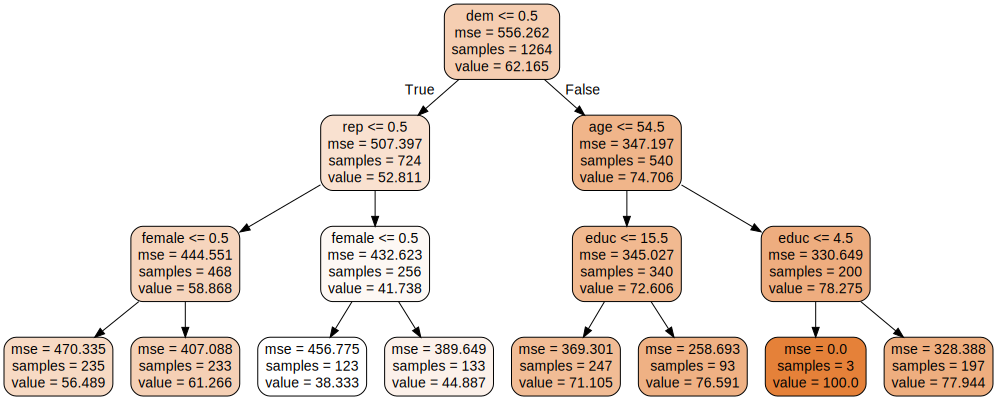

In [7]:
b_tree_viz = export_graphviz(
    b_tree,
    out_file=None,
    class_names = b_tree.classes_,
    feature_names = biden.columns[1:],
    rounded=True,
    filled=True,
)

graph = graphviz.Source(b_tree_viz)
graph.render('b_tree_viz')
graph

In [8]:
y_pred = b_tree.predict(X_test)

In [9]:
MSE1 = mean_squared_error(y_test, y_pred)
print('Test MSE=', MSE1)

Test MSE= 394.761999922


As mentioned above, I chose max_depth=3 as my limiting variable for this tree because the MSE was the lowest for the first few tree depths (max_depth=1 has MSE of 420, max_depth=2 has MSE of 400, max_depth=4 has MSE of 400, and max_depth=5 has MSE of 407).

The nodes tell us the following information: the first node indicates that there is a large split between democrate and republican, with democrats (>0.5) liking biden more than republicans. These democrats like Biden more if there are over 54.5. If these democrats over 54.5 are educated for more than 4.5 years, they have a mean feeling thermometer rating of 77.944 towards Biden, but those with less than 4.5 years of education (of which there are 3) have a mean score of 100. If these democrats are younger than 54.5, then they are also divided by their education level: those with more than 15.5 years of education (late college into grad school) have a slightly higher feeling thermometer on average (76.591) than those with less than 15.5 years of education (71.105).

The non-democrats (dem less than 0.5) are then divided into whether or not they identify as republican. 256 identify as republican, and of these, females like Biden more than non-females (44.887 vs. 39.333). If they do not identify as republican, they on average like Biden more, and again the females of this group like Biden more on average than the males (61.266 vs. 56.489). 

Thus, for non-democrats, party and gender matter the most, and for democrats, age and education matter the most.

### (b)

In [10]:
for i in range(1,11):
    b_tree = DecisionTreeRegressor(max_depth=i)
    b_tree.fit(X_train, y_train)
    y_pred = b_tree.predict(X_test)
    MSE1 = mean_squared_error(y_test, y_pred)
    print('Test MSE for', i, 'max_depth=', MSE1)

Test MSE for 1 max_depth= 420.022452935
Test MSE for 2 max_depth= 400.065398184
Test MSE for 3 max_depth= 394.761999922
Test MSE for 4 max_depth= 400.113290357
Test MSE for 5 max_depth= 407.409272903
Test MSE for 6 max_depth= 426.046570797
Test MSE for 7 max_depth= 459.644759028
Test MSE for 8 max_depth= 532.591764727
Test MSE for 9 max_depth= 543.152439342
Test MSE for 10 max_depth= 559.120592988


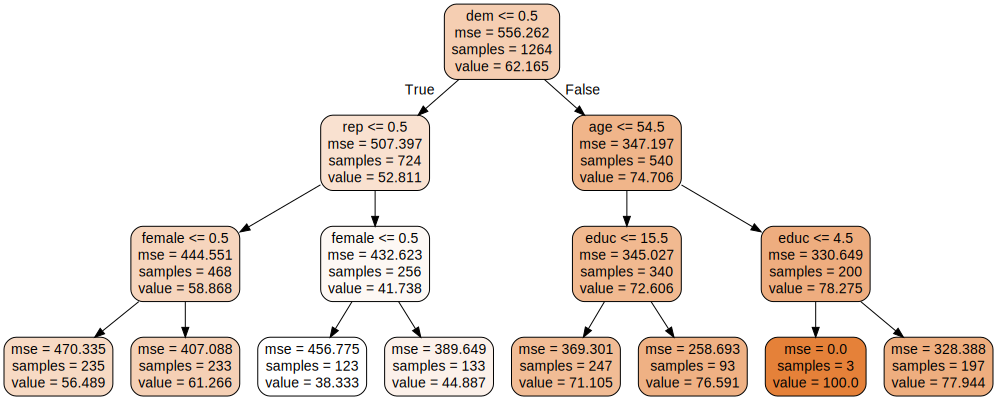

In [11]:
b_tree2 = DecisionTreeRegressor(max_depth=3)
b_tree2.fit(X_train, y_train)

b_tree_viz2 = export_graphviz(
    b_tree2,
    out_file=None,
    class_names = b_tree2.classes_,
    feature_names = biden.columns[1:],
    rounded=True,
    filled=True,
)

graph = graphviz.Source(b_tree_viz2)
graph.render('b_tree_viz2')
graph

As already seen above, the best tree has max_depth=3. Doing this pruning does improve the test MSE and make the results easier to interpret.

### (c)

In [12]:
from sklearn.ensemble import BaggingRegressor

In [13]:
b_tree_bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                             max_samples=100, bootstrap=True, oob_score=True, random_state=15)
b_tree_bag.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=15, verbose=0, warm_start=False)

In [14]:
b_tree_bag.score(X, y)
y_pred_bag = b_tree_bag.oob_prediction_
MSE3 = mean_squared_error(y, y_pred_bag)
print('MSE=', MSE3)

MSE= 406.000558395


### (d)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
max_samples = 150
MSE_vec4 = np.zeros(max_samples)
for ind in range(1, max_samples + 1):
    b_tree4_loop = RandomForestRegressor(n_estimators=ind, max_features=1,
                                           bootstrap=True, oob_score=True,
                                           random_state=15)
    b_tree4_loop.fit(X, y)
    y_pred4_loop = b_tree4_loop.oob_prediction_
    MSE_vec4[ind - 1] = mean_squared_error(y, y_pred4_loop)
    print('MSE=', MSE_vec4[ind - 1])

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to comput

MSE= 3086.28972513
MSE= 2242.38060326
MSE= 1662.43601294
MSE= 1296.80339276
MSE= 1056.85286041
MSE= 924.737171934
MSE= 825.973699078
MSE= 760.373765247
MSE= 683.500174379
MSE= 640.676759326
MSE= 630.72278858
MSE= 613.153121999


/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to comput

MSE= 593.629824008
MSE= 588.962953997
MSE= 582.476615897
MSE= 574.402508502
MSE= 562.079056266
MSE= 562.863902877
MSE= 558.906145785
MSE= 557.55904858
MSE= 555.286288605
MSE= 551.399155352
MSE= 549.875628792
MSE= 548.397850345
MSE= 547.325126156
MSE= 546.328390209
MSE= 544.185185236
MSE= 542.874351543
MSE= 540.113269413
MSE= 540.559888367
MSE= 539.170816533
MSE= 537.060588799
MSE= 537.258906656
MSE= 537.124128433
MSE= 534.383428365
MSE= 534.071475095
MSE= 534.486304612
MSE= 534.470859169
MSE= 535.059753432
MSE= 535.433251299
MSE= 534.607291316
MSE= 535.123290425
MSE= 534.115298938
MSE= 534.952370691
MSE= 534.289170363
MSE= 534.449834964
MSE= 534.586418279
MSE= 535.29053248
MSE= 536.019229813
MSE= 534.938911887
MSE= 535.355129974
MSE= 534.112943648
MSE= 532.875057972
MSE= 533.200687242
MSE= 533.726162415
MSE= 533.273076789
MSE= 534.21316933
MSE= 533.790920645
MSE= 534.118185484
MSE= 533.512752982
MSE= 533.27630862
MSE= 533.448256181
MSE= 533.033199088
MSE= 534.164196267
MSE= 535.0547079

In [27]:
min(MSE_vec4)

529.89451553629613

In [18]:
b_tree5 = RandomForestRegressor(max_features=2, bootstrap=True,
                                  oob_score=True, random_state=15)
b_tree5.fit(X, y)

b_tree5.score(X, y)
y_pred5 = b_tree5.oob_prediction_
MSE5 = mean_squared_error(y, y_pred5)
print('MSE for m=2 is', MSE5)

MSE for m=2 is 648.74872652


/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [19]:
b_tree6 = RandomForestRegressor(max_features=3, bootstrap=True,
                                  oob_score=True, random_state=15)
b_tree6.fit(X, y)

b_tree6.score(X, y)
y_pred6 = b_tree6.oob_prediction_
MSE6 = mean_squared_error(y, y_pred6)
print('MSE for m=3 is', MSE6)

MSE for m=3 is 641.28693132


/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
